# Google Playstore Case Study

In this module you’ll be learning data visualisation with the help of a case study. This will enable you to understand how visualisation aids you in solving business problems. 

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




### Session 1 - Introduction to Data Visualisation

In [126]:
#import the libraries
import pandas as pd, numpy as np

In [127]:
#read the dataset and check the first five rows
inp0 = pd.read_csv("googleplaystore_v2.csv")
display(inp0.head());
display(inp0.tail());

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.000000,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [128]:
#Check the shape of the dataframe
print(inp0.shape)

(10841, 13)


### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [129]:
#Check the datatypes of all the columns of the dataframe
print(inp0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB
None


#### Missing Value Treatment

In [130]:
#Check the number of null values in the columns
inp1 = inp0.isnull().sum()
display(inp1)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [131]:
#Drop the rows having null values in the Rating field
inp1 = inp0[~inp0.Rating.isnull()]
inp2 = inp1
#Check the shape of the dataframe
inp2.shape

(9367, 13)

In [132]:
# Check the number of nulls in the Rating field again to cross-verify
inp2.Rating.isnull().sum()

0

In [133]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values
inp2.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [134]:
#Inspect the nulls in the Android Version column
display(inp2[inp2['Android Ver'].isnull()])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [195]:
#Drop the row having shifted values
inp1 = inp2[(inp2['Android Ver'].isnull() & (inp2.Category == "1.9"))]
display(inp1)
#Check the nulls againin Android version column to cross-verify
inp3 = inp2[~(inp2['Android Ver'].isnull() & (inp2.Category == "1.9"))]
display(inp3[inp3['Android Ver'].isnull()])

print(len(inp3[inp3['Android Ver']=='4.1 and up']))


inp3['Current Ver'] = inp3['Current Ver'].fillna(inp3['Current Ver'].mode()[0])
inp3['Current Ver'].isnull().sum()
#After that do a value_counts()
inp3['Current Ver'].value_counts()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


2059


C:\Users\Padmaja\AppData\Local\Temp\ipykernel_26664\4294037523.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3['Current Ver'] = inp3['Current Ver'].fillna(inp3['Current Ver'].mode()[0])


Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [196]:
# Price column


inp3.dtypes
display(inp3.head())
print(inp3.Price.value_counts())
inp3.Price = inp3.Price.apply(lambda x:0 if x=='0' else float(str(x)[1:]))
print(inp3.Price.dtype)
print(inp3.Price)
print(inp3.Price.value_counts())

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64
float64
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9366, dtype: float64
0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: Price, Length: 73, dtype: int64


C:\Users\Padmaja\AppData\Local\Temp\ipykernel_26664\3623587917.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3.Price = inp3.Price.apply(lambda x:0 if x=='0' else float(str(x)[1:]))


#### Handling Incorrect Data Types 

In [197]:
#Analyse the Reviews column

inp3.Reviews = inp3.Reviews.astype("int32")
print(inp3.Reviews.describe())

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64


C:\Users\Padmaja\AppData\Local\Temp\ipykernel_26664\1054777242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3.Reviews = inp3.Reviews.astype("int32")


In [198]:
#Analyse the Installs Column
import copy

#inp3.Installs.head()
inp3['Installs'].value_counts()

df_playstore_installs = copy.deepcopy(inp3.Installs)
# get the indexes of the rows that are 
#   not ready to be converted to int.
index_install_plus = df_playstore_installs.str.endswith('+')
# convert to int
df_playstore_installs[index_install_plus] = (
    df_playstore_installs[index_install_plus].apply(
        lambda x : int(x[:-1].replace(',', '')) + 1
    )
)
# apply the change to the main data frame
#   and rename the column to make it more clear.
inp3.Installs = df_playstore_installs.astype("int64")

inp3

C:\Users\Padmaja\AppData\Local\Temp\ipykernel_26664\2263863913.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3.Installs = df_playstore_installs.astype("int64")


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10001,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500001,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000001,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000001,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100001,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,501,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5001,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,101,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1001,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [199]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.


#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [200]:
#Perform the sanity checks on the Reviews column



# Average rating between 1 - 5
print(inp3.Rating.describe())
print(inp3.Reviews.describe())
# reviews should be <= installs
display(inp3[(inp3.Reviews > inp3.Installs)])
inp3[(inp3.Reviews > inp3.Installs)].shape

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64
count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,2,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10001,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,6,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,11,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up


(4, 13)

In [201]:
#Perform the sanity checks on the Reviews column (continued)

inp3 = inp3[inp3.Reviews <= inp3.Installs]
inp3[(inp3.Type=="Free") & (inp1.Price>"0")]

C:\Users\Padmaja\AppData\Local\Temp\ipykernel_26664\274341033.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inp3[(inp3.Type=="Free") & (inp1.Price>"0")]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [202]:
#perform the sanity checks on prices of free apps 


#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

![BoxPlots to Identify Outliers](images\Boxplot.png)

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [203]:
#import the plotting libraries

import matplotlib.pyplot as plt
%matplotlib inline

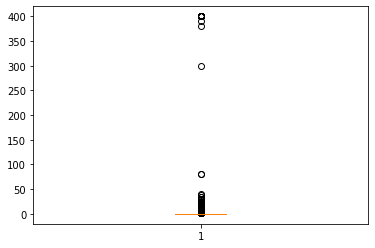

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,101,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10001,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10001,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100001,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10001,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50001,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1001,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1001,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5001,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5362,I Am Rich Pro,FAMILY,4.4,201,2700.0,5001,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up


In [204]:
#Create a box plot for the price column
plt.boxplot(inp3.Price)
(plt.show())
display(inp3[inp3.Price > 300])

In [205]:
#Clean the Price column
inp3 = (inp3[inp3.Price <200])
inp3.Price.describe()

count    9347.000000
mean        0.334621
std         2.169623
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

<AxesSubplot:>

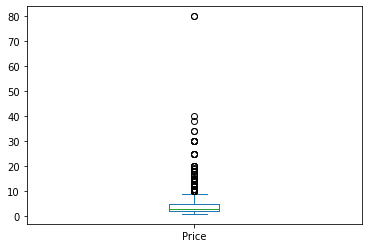

In [206]:
#Create a box plot for paid apps
inp3[inp3.Price>0].Price.plot.box()

In [207]:
#Check the apps with price more than 30
display(inp3[inp3.Price>30])
display(inp3[inp3.Price<30])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1001,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1001,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1001,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1001,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,101,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1001,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10001,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500001,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000001,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000001,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100001,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,501,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5001,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,101,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1001,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [208]:
#Clean the Price column again
inp3 = inp3[inp3.Price<=30]
inp3.shape

(9341, 13)

### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


![Histogram](images\Histogram.png)

You can adjust the number of bins to improve its granularity

![Bins change](images\Granular.png)

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

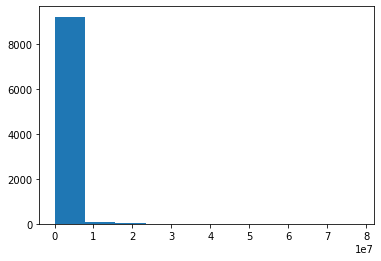

In [209]:
#Create a histogram of the Reviews (how are the reviews distributed)
# ?plt.hist
plt.hist(inp3.Reviews)
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x1a7335ace20>,
 'caps': [<matplotlib.lines.Line2D at 0x1a7335ad3c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a7335acc70>],
 'medians': [<matplotlib.lines.Line2D at 0x1a7335ad960>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a7335adc30>],
 'means': []}

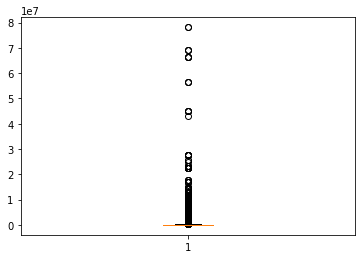

In [210]:
#Create a boxplot of the Reviews column

plt.boxplot(inp3.Reviews)

In [211]:
#Check records with 1 million reviews

inp3[inp3.Reviews >= 10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1000000001,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000001,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,500000001,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,500000001,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000001,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,100000001,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,500000001,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
7937,Shadow Fight 2,GAME,4.6,10981850,88000.000000,100000001,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,100000001,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up


In [212]:
#Drop the above records

inp3 = inp3[inp3.Reviews <= 10000000]
inp3.shape

(9249, 13)

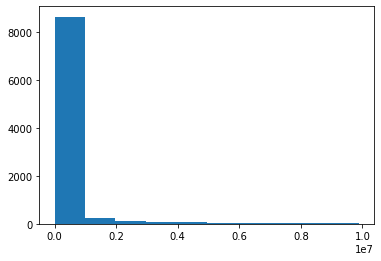

In [213]:
#Question - Create a histogram again and check the peaks

plt.hist(inp3.Reviews)
plt.show()

count    9.249000e+03
mean     1.303138e+07
std      6.864481e+07
min      2.000000e+00
25%      1.000100e+04
50%      5.000010e+05
75%      5.000001e+06
max      1.000000e+09
Name: Installs, dtype: float64

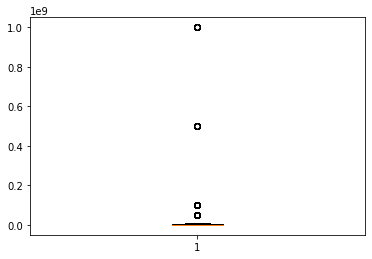

In [214]:
#Question - Create a box plot for the Installs column and report back the IQR

plt.boxplot(inp3.Installs)
inp3.Installs.describe()  # to find out IQR

In [215]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs

inp3 = inp3[inp3.Installs <= 100000000]
inp3.shape

(8802, 13)

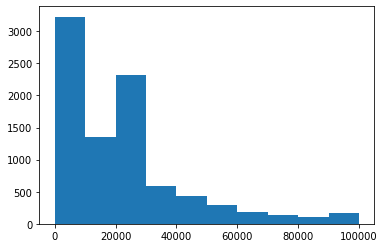

In [216]:
#Plot a histogram for Size as well.
plt.hist(inp3.Size)
plt.show()

count      8802.000000
mean      21967.200069
std       20898.875236
min           8.500000
25%        6200.000000
50%       19000.000000
75%       26000.000000
max      100000.000000
Name: Size, dtype: float64

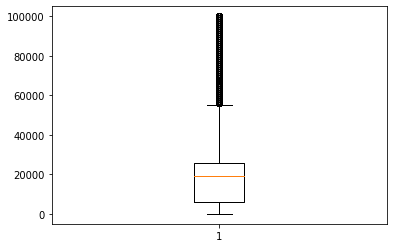

In [217]:
#Question - Create a boxplot for the Size column and report back the median value

plt.boxplot(inp3.Size)
inp3.Size.describe()  # to find out IQR

### Session 2 - Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

_Functionalities of Seaborn_ :

- Dataset oriented API
- Analysing univariate and bivariate distributions
- Automatic estimation and plotting of  linear regression models
- Convenient views for complex datasets
- Concise control over style
- Colour palettes


In [218]:
#import the necessary libraries
import warnings
warnings.filterwarnings("ignore")

#### Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate probability density curve. 

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

![Distplot](images\Distplot.png)

You'll be using sns.distplot for plotting a distribution plot. Check out its official documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html

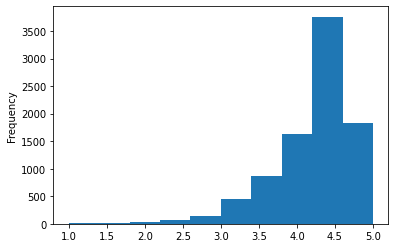

In [220]:
#Create a distribution plot for rating
inp3.Rating.plot.hist()
plt.show()

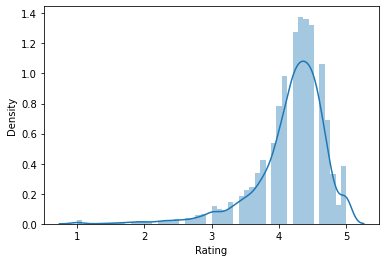

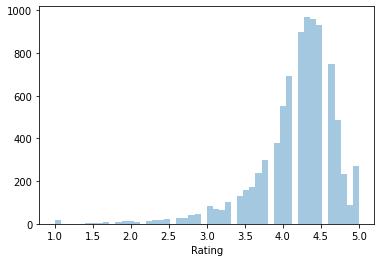

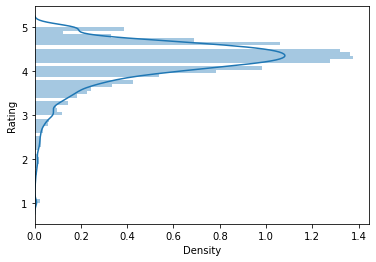

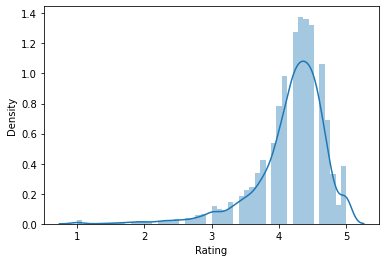

In [229]:
# Seaborn intro

import seaborn as sns
sns.distplot(inp3.Rating)
plt.show()
sns.distplot(inp3.Rating,kde = False)
plt.show()
sns.distplot(inp3.Rating,vertical=True)
plt.show()
sns.distplot(inp3.Rating,vertical=False)
plt.show()
# horizontal is an invalid parameter
    # sns.distplot(inp3.Rating,horizontal=True)
    # plt.show()
    # sns.distplot(inp3.Rating,horizontal=False)
    # plt.show()

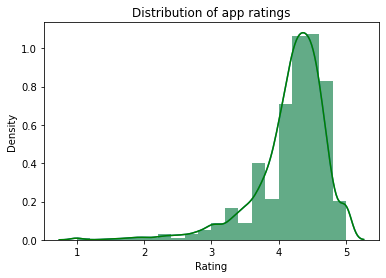

In [233]:
#Change the number of bins
sns.distplot(inp3.Rating, bins = 20)
#plt.show()

#Change the colour of bins to green
sns.distplot(inp3.Rating, bins = 20, color='g')
plt.title("Distribution of app ratings", fontsize=12)
plt.show()

#### Styling Options

One of the biggest advantages of using Seaborn is that you can retain its aesthetic properties and also the Matplotlib functionalities to perform additional customisations. Before we continue with our case study analysis, let’s study some styling options that are available in Seaborn.

-  Check out the official documentation:https://seaborn.pydata.org/generated/seaborn.set_style.html

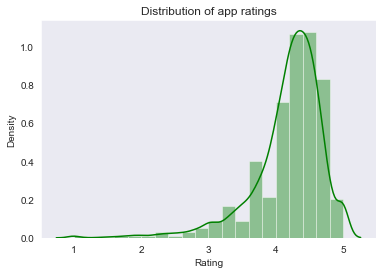

In [240]:
#Check all the styling options

# ?sns.set_style
sns.set_style("dark")
sns.distplot(inp3.Rating, bins=20, color='g')
plt.title("Distribution of app ratings", fontsize=12)
plt.show()

#### Matplotlib themes / styles
plt.style.available
plt.style.use("tableau-colorblind10")

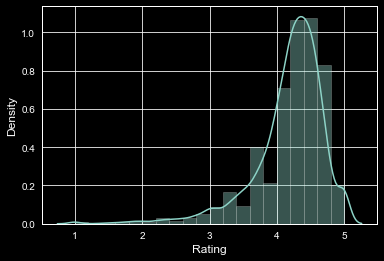

In [246]:
#Change the number of bins to 20

plt.style.use("ggplot")
plt.style.use("dark_background")
sns.distplot(inp3.Rating, bins=20)
plt.show()

#### Pie-Chart and Bar Chart

For analysing how a numeric variable changes across several categories of a categorical variable you utilise either a pie chart or a box plot

For example, if you want to visualise the responses of a marketing campaign, you can use the following views:

![PieChart](images\pie.png)

![barChart](images\bar.png)

- You'll be using the pandas method of plotting both a pie chart and a bar chart. Check out their official documentations:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

In [247]:
#Analyse the Content Rating column

inp3['Content Rating'].value_counts()

Everyone           7022
Teen                992
Mature 17+          435
Everyone 10+        349
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [248]:
#Remove the rows with values which are less represented ("Adults only 18+" and "Unrated")
inp3 = inp3[~inp3['Content Rating'].isin(["Adults only 18+","Unrated"])]
inp3.shape


(8798, 13)

In [250]:
#Reset the index
inp3.reset_index(inplace=True, drop=True)
inp3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8798 entries, 0 to 8797
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8798 non-null   object 
 1   Category        8798 non-null   object 
 2   Rating          8798 non-null   float64
 3   Reviews         8798 non-null   int32  
 4   Size            8798 non-null   float64
 5   Installs        8798 non-null   int64  
 6   Type            8798 non-null   object 
 7   Price           8798 non-null   float64
 8   Content Rating  8798 non-null   object 
 9   Genres          8798 non-null   object 
 10  Last Updated    8798 non-null   object 
 11  Current Ver     8798 non-null   object 
 12  Android Ver     8796 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 859.3+ KB


In [251]:
#Check the apps belonging to different categories of Content Rating 
inp3['Content Rating'].value_counts()

Everyone        7022
Teen             992
Mature 17+       435
Everyone 10+     349
Name: Content Rating, dtype: int64

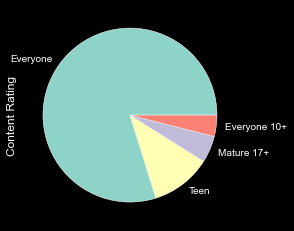

In [255]:
#Plot a pie chart

inp3['Content Rating'].value_counts().plot.pie()
plt.show()


<AxesSubplot:>

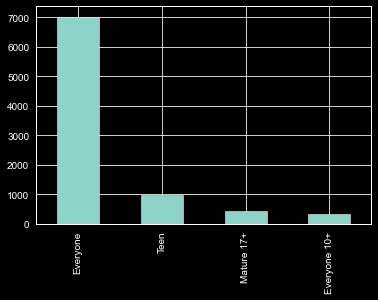

In [256]:
#Plot a bar chart
inp3['Content Rating'].value_counts().plot.bar()

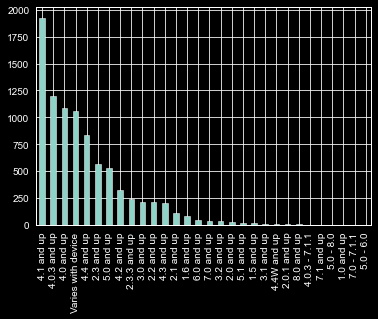

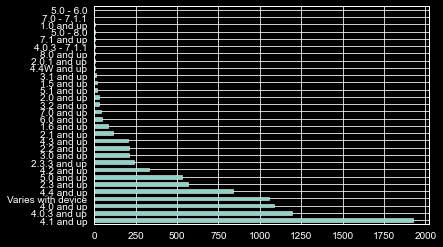

In [258]:
#Question - Plot a bar plot for checking the 4th highest Android version type
inp3['Android Ver'].value_counts().plot.bar()
plt.show()
inp3['Android Ver'].value_counts().plot.barh()
plt.show()

#### Scatter Plots

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot. 

![Scatterplot](images\scatter.png)

- They're pretty useful in regression problems to check whether a linear trend exists in the data or not. For example, in the image below, creating a linear model in the first case makes far more sense since a clear straight line trend is visible.

![Scatterplot-Reg](images\regression3.png)

- Also, they help in observing __naturally occuring clusters__. In the following image, the marks of students in Maths and Biology has been plotted.You can clearly group the students to 4 clusters now. Cluster 1 are students who score very well in Biology but very poorly in Maths, Cluster 2 are students who score equally well in both the subjects and so on.

![Scatter-Clusters](images\Clusters.png)

**Note**: You'll be studying about both Regression and Clustering in greater detail in the machine learning modules

You'll be using **sns.jointplot()** for creating a scatter plot. Check out its documentation:
https://seaborn.pydata.org/generated/seaborn.jointplot.html

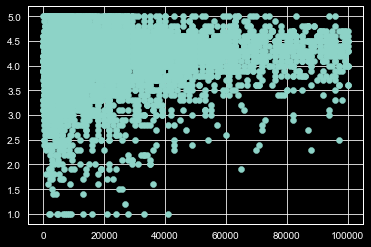

In [259]:
###Size vs Rating

##Plot a scatter-plot in the matplotlib way between Size and Rating
plt.scatter(inp3.Size, inp3.Rating)
plt.show()

Object `sns.jointplot()` not found.


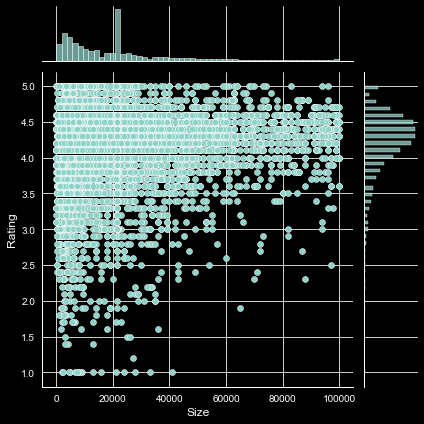

In [263]:
### Plot the same thing now using a jointplot
?sns.jointplot()
sns.jointplot(inp3.Size, inp3.Rating)
plt.show()


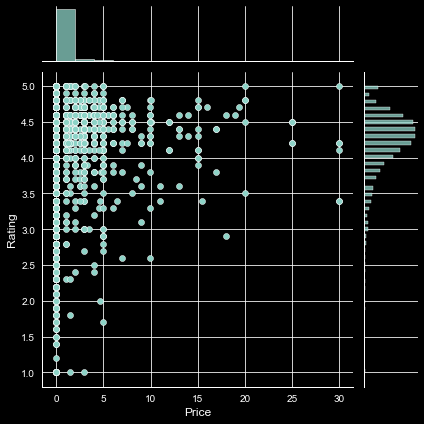

In [264]:
## Plot a jointplot for Price and Rating
sns.jointplot(inp3.Price, inp3.Rating)

**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view 

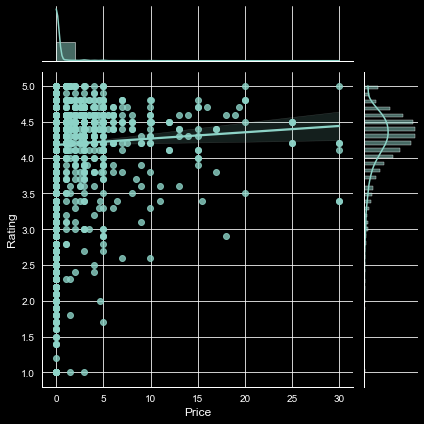

In [265]:
##Plot a reg (regression) plot for Price and Rating and observe the trend

sns.jointplot(inp3.Price, inp3.Rating,kind='reg')


**Pair Plots**

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram**

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.

![Pairplots](images\pairplots2.png)

It is clearly visible that the left-most factor is the most prominently related to the profits, given how linearly scattered the points are and how randomly scattered the rest two factors are.

You'll be using **sns.pairplot()** for this visualisation. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.pairplot.html

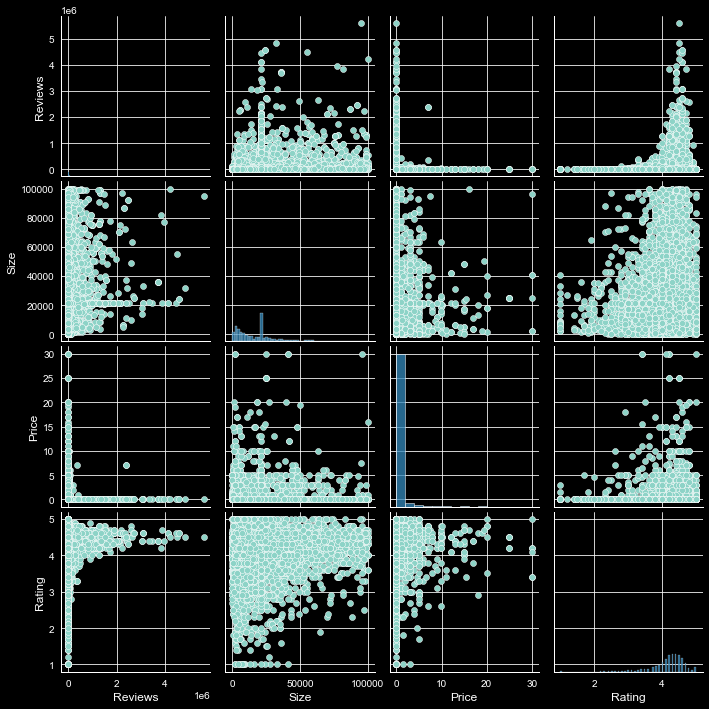

In [271]:
## Create a pair plot for Reviews, Size, Price and Rating

#?sns.pairplot()
sns.pairplot(inp3[["Reviews","Size","Price","Rating"]])
plt.show()

**Bar Charts Revisited**

- Here, you'll be using bar charts once again, this time using the **sns.barplot()** function. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.barplot.html
- You can modify the **estimator** parameter to change the aggregation value of your barplot

<AxesSubplot:xlabel='Content Rating'>

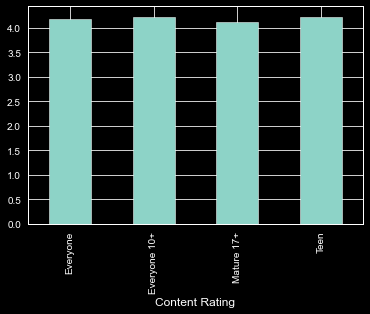

In [272]:
##Plot a bar plot of Content Rating vs Average Rating 

inp3.groupby(['Content Rating'])['Rating'].mean().plot.bar()

<AxesSubplot:xlabel='Content Rating'>

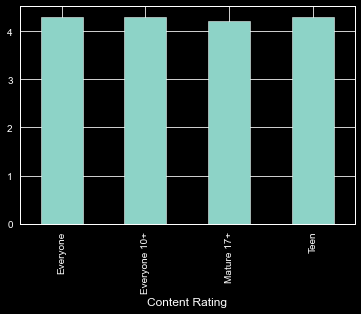

In [273]:
##Plot the bar plot again with Median Rating
inp3.groupby(['Content Rating'])['Rating'].median().plot.bar()

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

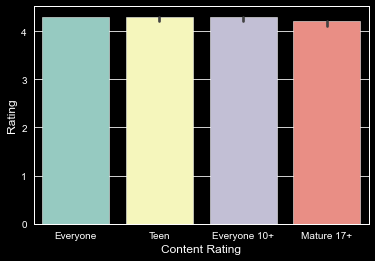

In [275]:
##Plot the above bar plot using the estimator parameter

sns.barplot(data=inp3, x="Content Rating", y="Rating", estimator = np.median)

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

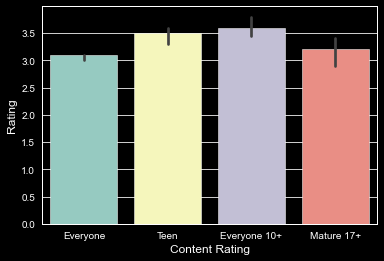

In [276]:
##Plot the bar plot with only the 5th percentile of Ratings
sns.barplot(data=inp3, x="Content Rating", y="Rating", estimator = lambda x: np.quantile(x,0.05))

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

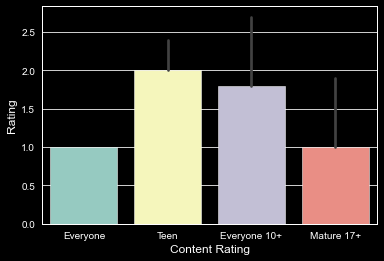

In [279]:
##Question - Plot the bar plot with the minimum Rating
sns.barplot(data=inp3, x="Content Rating", y="Rating", estimator = np.min)

__Box Plots Revisited__

- Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories
- Here you'll be using **sns.boxplot()** function to plot the visualisation. Check out its documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html




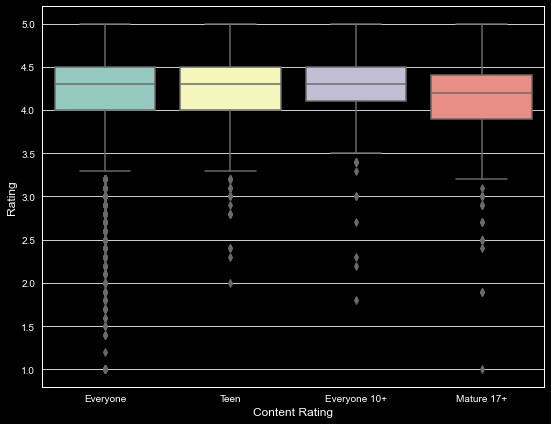

In [283]:
##Plot a box plot of Rating vs Content Rating
plt.figure(figsize=[9,7])
sns.boxplot(inp3['Content Rating'],inp3.Rating)
plt.show()

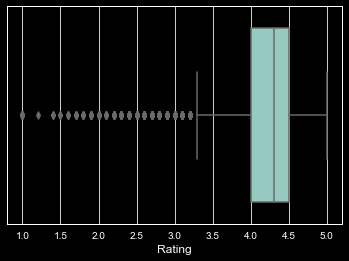

In [290]:
##Question - Plot a box plot for the Rating column and Content rating only


sns.boxplot(inp3['Rating'])
plt.show()

# error
    # sns.boxplot(inp3['Content Rating'])
    # plt.show()



Tools                                695
Entertainment                        510
Education                            468
Medical                              344
Sports                               317
                                    ... 
Travel & Local;Action & Adventure      1
Board;Pretend Play                     1
Health & Fitness;Education             1
Music & Audio;Music & Video            1
Strategy;Creativity                    1
Name: Genres, Length: 115, dtype: int64

<AxesSubplot:xlabel='Genres', ylabel='Rating'>

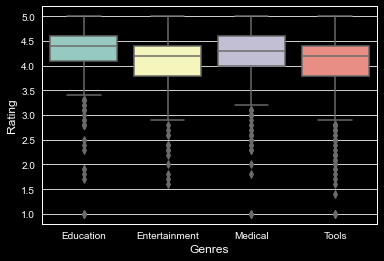

In [294]:
##Question - Plot a box plot of Ratings across the 4 most popular Genres

display(inp3["Genres"].value_counts())
c = ['Tools','Entertainment','Medical','Education']

sns.boxplot(inp3[inp3['Genres'].isin(c)]['Genres'],inp3.Rating)

#### Heat Maps

Heat mapsutilise the concept of using colours and colour intensities to visualise a range of values. You must have seen heat maps in cricket or football broadcasts on television to denote the players’ areas of strength and weakness.

![HeatMap](images\heatmap1.png)

- In python, you can create a heat map whenever you have a rectangular grid or table of numbers analysing any two features

![heatmap2](images\heatmap2.png)

- You'll be using **sns.heatmap()** to plot the visualisation. Checkout its official documentation :https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [298]:
##Ratings vs Size vs Content Rating

##Prepare buckets for the Size column using pd.qcut
    # plt.figure(figsize=[9,7])
    # sns.boxplot(inp3['Content Rating'],inp3.Rating)
    # plt.show()

#?pd.qcut
inp3['Size_Bucket'] = pd.qcut(inp3.Size,[0,0.2,0.4,0.6,0.8,1],["VL","L","M","H","VH"])
inp3.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10001,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500001,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000001,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000001,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100001,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL


In [299]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
pd.pivot_table(data=inp3, index="Content Rating", columns="Size_Bucket", values="Rating")


Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.115294,4.163867,4.226704,4.168142,4.198884
Everyone 10+,4.189474,4.207407,4.243636,4.215385,4.228906
Mature 17+,3.969231,4.129787,4.045714,4.165574,4.196040
Teen,4.190000,4.231618,4.175884,4.218182,4.268827


In [300]:
##Change the aggregation to median
pd.pivot_table(data=inp3, index="Content Rating", columns="Size_Bucket", values="Rating", aggfunc=np.median)


Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.20,4.3,4.3,4.3,4.3
Everyone 10+,4.10,4.3,4.3,4.3,4.3
Mature 17+,4.20,4.2,4.2,4.1,4.2
Teen,4.25,4.3,4.2,4.2,4.3


In [302]:
##Change the aggregation to 20th percentile
res = pd.pivot_table(data=inp3, index="Content Rating", columns="Size_Bucket", values="Rating",
              aggfunc = lambda x:np.quantile(x,0.2))
res

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.86,3.92,4.1,4.0,4.0
Mature 17+,3.30,3.70,3.8,3.9,4.0
Teen,3.80,3.90,3.9,4.0,4.0


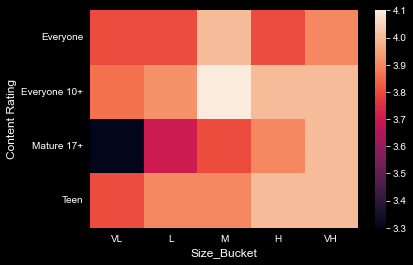

In [305]:
##Plot a heat map
sns.heatmap(res)
plt.show()

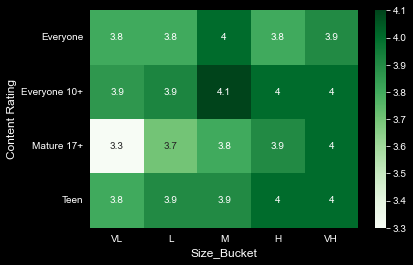

In [306]:
##Apply customisations
sns.heatmap(res, cmap="Greens", annot=True)
plt.show()

In [80]:
##Question - Replace Content Rating with Review_buckets in the above heat map
##Keep the aggregation at minimum value for Rating


### Session 3: Additional Visualisations

#### Line Plots

- A line plot tries to observe trends using time dependent data.
-  For this part, you'll be using **pd.to_datetime()** function. Check out its documentation:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html


In [308]:
## Extract the month from the Last Updated Date
inp3['Last Updated'].head()


0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [309]:
## Find the average Rating across all the months
inp3['updated_month'] = pd.to_datetime(inp3['Last Updated']).dt.month
inp3.groupby(['updated_month'])['Rating'].mean()


updated_month
1     4.145050
2     4.092566
3     4.112844
4     4.151553
5     4.160099
6     4.177799
7     4.235548
8     4.276402
9     4.041634
10    4.019687
11    4.103679
12    4.068278
Name: Rating, dtype: float64

<AxesSubplot:xlabel='updated_month'>

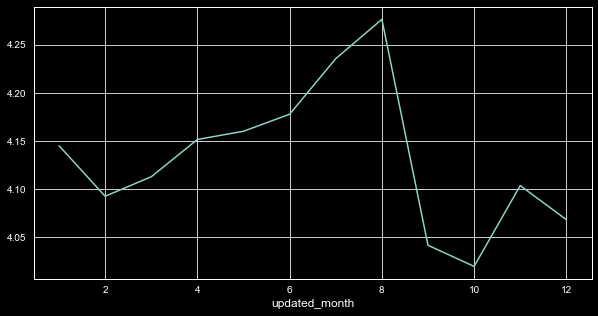

In [310]:
## Plot a line graph
plt.figure(figsize=[10,5])
inp3.groupby(['updated_month'])['Rating'].mean().plot()

#### Stacked Bar Charts

- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category
- For example, for the Campaign Response bar chart you saw earlier, the stacked bar chart is also showing the Gender bifurcation as well

![Stacked](images\stacked.png)

In [312]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs
pd.pivot_table(data=inp3, values="Installs",index="updated_month",columns = "Content Rating", aggfunc=sum)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
updated_month,,,,
1,725387726,105282024,9701227,44159037
2,545372361,19821016,13021515,39597741
3,745365990,30322529,9111115,99850362
4,993371582,23300011,5259019,271619461
5,1731068472,128173528,110140125,462689687
6,2457171354,367727148,155257256,505716719
7,8791111643,826556105,839492085,2683557131
8,5290944292,215821058,562981783,1597855821
9,310340619,24931117,2201016,22483125


In [314]:
##Store the table in a separate variable
monthly = pd.pivot_table(data=inp3, values="Installs",index="updated_month",columns = "Content Rating", aggfunc=sum)

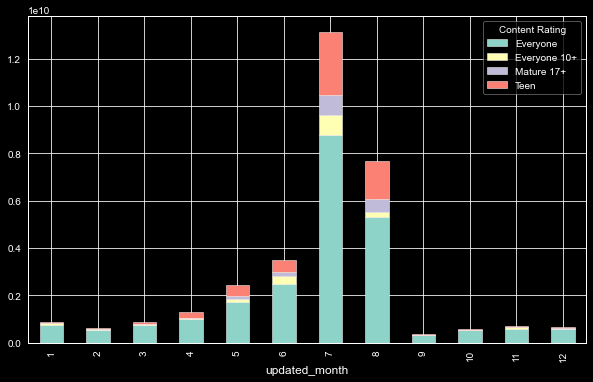

In [315]:
##Plot the stacked bar chart.
monthly.plot(kind='bar', stacked="True",figsize=[10,6])
plt.show()

<class 'pandas.core.frame.DataFrame'>


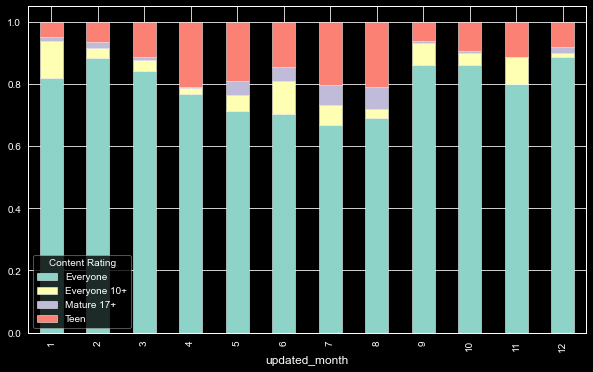

In [330]:
##Plot the stacked bar chart again wrt to the proportions.
print(type(monthly[["Everyone","Everyone 10+","Mature 17+","Teen"]].apply(lambda x:x/x.sum(), axis=1)))
monthly_perc: pd.core.frame.DataFrame = monthly[["Everyone","Everyone 10+","Mature 17+","Teen"]].apply(lambda x:x/x.sum(), axis=1)
monthly_perc.plot(kind='bar', stacked="True",figsize=[10,6])
plt.show()

#### Plotly

Plotly is a Python library used for creating interactive visual charts. You can take a look at how you can use it to create aesthetic looking plots with a lot of user-friendly functionalities like hover, zoom, etc.

Check out this link for installation and documentation:https://plot.ly/python/getting-started/

In [341]:
#Take the table you want to plot in a separate variable
res = inp3.groupby(['updated_month'])[['Rating']].mean().reset_index(inplace=False)
res

,updated_month,Rating
0,1,4.145050
1,2,4.092566
2,3,4.112844
3,4,4.151553
4,5,4.160099
5,6,4.177799
6,7,4.235548
7,8,4.276402
8,9,4.041634
9,10,4.019687


In [342]:
#Install plotly
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [343]:
#Import the plotly libraries
fig = px.line(res,x = "updated_month",y="Rating", title="Monthly average rating")
fig.show()

NameError: name 'px' is not defined

In [91]:
#Prepare the plot
